# **A Regression Model to predict Salary based on employee's years of experience in working using Simple Linear Regression**

**Step 1: Importing the required libraries**
1. Pandas
2. Numpy
3. Pyplot from Matplotlib
4. Linear Regression from Scikit Learn
5. Evaluation Metrics viz. MAE, MSE, RMSE, R-2

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

**Step 2: Load the dataset**

In [ ]:
#Step 1: Loading the dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML-DSE4/Project_College/salary_data - salary_data (1).csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


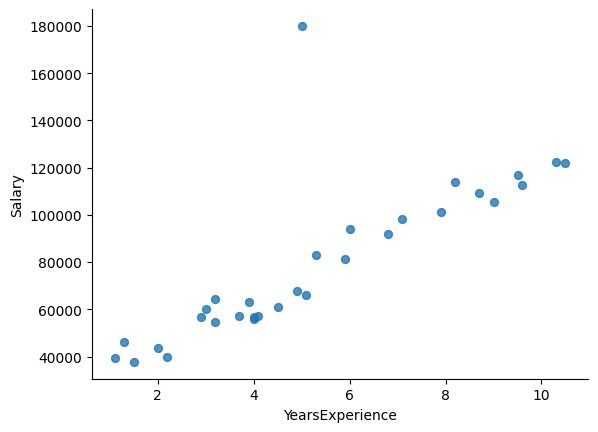

In [ ]:
df.plot(kind='scatter', x='YearsExperience', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**Step 3: Exploring the dataset**

1. Displaying first 5 rows of the dataset
2. Displaying the meta info of the dataset
3. Describing the dataset features using 5 number summary

In [ ]:
#Step 2: Exploring the data
print(df.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  33 non-null     float64
 1   Salary           32 non-null     float64
dtypes: float64(2)
memory usage: 692.0 bytes
None


In [ ]:
print(df.describe())

       YearsExperience         Salary
count        33.000000      32.000000
mean          5.603030  101252.812500
std           3.141206  127989.469434
min           1.100000   37731.000000
25%           3.200000   56878.250000
50%           5.000000   66983.500000
75%           7.900000  106544.250000
max          14.500000  780000.000000


**Step 4: Checking for number of null values present for both feature columns**

In [ ]:
df.isnull().sum()

,0
YearsExperience,2
Salary,3


Dropping the missing values as it won't affect the training of our model

In [ ]:
# Step 3: Handle missing values
df.dropna(inplace=True)  # Drop remaining missing values (optional)

Rechecking for number of missing values present for both feature columns still now.

In [ ]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


**Step 5: Separately loading the independent feature column (Years of Experience) into X and Dependent feature column (Salary) into y**

In [ ]:
X=df[['YearsExperience']]
y=df['Salary']

**Step 6: Splitting the dataset into test and train sets for both features and training the model**

In [ ]:
# Step 5: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Step 6: Initializing the linear regression model
model=LinearRegression()

#Step 7: Training the model with training data
model.fit(X_train,y_train)

LinearRegression()

**Step 7: Predicting salary for test set years of experience**

In [ ]:
#Step 8: Make Predictions
y_pred=model.predict(X_test)


**Step 8: Evaluating the model to get Mean Absolute Error, Mean Square Error, Root Mean Sqaure Error and R^2 score. More the R^2 score, more better is the model trained.**

In [ ]:
#Step 9: Evaluate the model
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 6491.059203246807
MSE: 45321601.19587368
RMSE: 6732.131994834451
R² Score: 0.9270297836251701


**Step 9: Taking user input of years of experience from user to predict their salary using the above model**

In [ ]:
#Take user input of years of experience from user to predict their salary using the above model
years_of_experience = float(input("Enter the number of years of experience: "))
predicted_salary = model.predict([[years_of_experience]])
print(f"The Predicted Salary for {years_of_experience} years of experience is: Rupees {predicted_salary[0]}")

Enter the number of years of experience: 9.8
The Predicted Salary for 9.8 years of experience is: Rupees 122763.63050840801


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Step 10: Plotting the Actual Vs Predicted Price regression line output

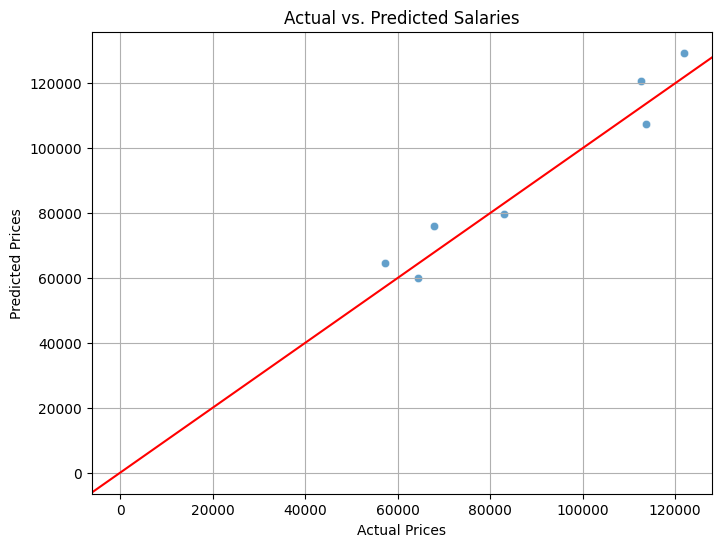

In [ ]:
# Step 15: Visualization - Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Salaries")
plt.grid()
plt.axline([0, 0], slope=1, color="red", linestyle="-")  # Reference line
plt.show()
